In [ ]:
from notebooks import *
print_sys_info()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The potoo.default_magic_magic extension is already loaded. To reload it, use:
  %reload_ext potoo.default_magic_magic
platform:
  machine: x86_64
  node: Dan-B.local
  processor: i386
  release: 15.6.0
  system: Darwin
  version: 'Darwin Kernel Version 15.6.0: Thu Jun 23 18:25:34 PDT 2016; root:xnu-3248.60.10~1/RELEASE_X86_64'
cpu: 8
mem: 16g
swap: 10g


In [ ]:
# Load model
#   - Chosen via notebooks/20180629_eval.ipynb (local runs) -> Train/test scores
search = Search.load_v0(

    # 'eval-na-dan170',
    #     'split_i=0,train=2693,test=674,classes=170', 'n_species=170,n_recs=1.0',
    #         'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',  # Not std
    #         'cls=std-sgdlog,alpha=0.1,class_weight=balanced',  # std [Re-run locally to get an n_species=170]

    'comp-l1-l2-na-ca',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=9,n_recs=1.0',
        #     'cls=logreg_ovr,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=82,n_recs=1.0',
        #     'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',
        #     'cls=logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=331,n_recs=1.0',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',

        'split_i=0,train=34875,test=331,classes=331', 'n_species=331,n_recs=1.0',
            'cls=ovr-logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',

).fix_missing_projection_skm(
    'peterson-v0-26bae1c',
)
projection = search.projection
features = projection.features
load = features.load
display(
    search,
    search.classifier_,
    len(search.classifier_.classes_),
)

[19:47:44.054] DEBUG  Projection.load
  path: /Users/danb/hack/bubo/features/data/models/projection/peterson-v0-26bae1c.pkl


Search(
  n_species=331,
  n_recs=1.0,
  classifier='cls: ovr-logreg_ovr,solver: liblinear,C: 0.001,class_weight: balanced',
  random_state=0,
  projection=Projection(
    features=Features(
      load=Load(channels=1, sample_rate=22050, sample_width_bit=16, cache_audio=True),
      sample_rate=22050,
      f_min=1000,
      f_bins=40,
      hop_length=256,
      frame_length=512,
      frame_window='hann',
      patch_length=4
    ),
    skm_fit_max_t=600000,
    k=500,
    variance_explained=0.99,
    do_pca=True,
    pca_whiten=True,
    standardize=False,
    normalize=False,
    agg_funs=['mean', 'std', 'max']
  )
)

OneVsRestClassifier(estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=45)

331

# Load user recs

In [ ]:
user_recs = load_app_recs(projection,
    # n=10,
)
display(
    df_summary(user_recs).T,
    df_value_counts(user_recs, dropna=False),
    user_recs[:10],
)

[19:47:44.142] DEBUG  Load.audio:in
  len(recs): 169
  len(recs) per dataset: {recordings: 169}
[

                                                                                            ] |   0% Completed |  0.0s

[                                                                                            ] |   0% Completed |  0.1s

[                                                                                            ] |   0% Completed |  0.2s

[

###################################                                                         ] |  38% Completed |  0.4s

[############################################################################################] | 100% Completed |  0.5s

[19:47:44.703] DEBUG  Load.audio:out
  len(audio): 169


[19:47:46.016] WARN   Dropped 1 recs with duplicate audio_id


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,audio_sha,id,path,audio,feat
audio_id,,,,,,,,,,,,,,,
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,Bewick's Wren - BEWR,c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2.wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02 -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.41...
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot),Bewick's Wren - BEWR,c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot),recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot).wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot): 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02 -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.41...


[19:47:46.073] DEBUG  Features.spectros:in
  len(recs): 168
  len(recs) per dataset: {recordings: 168}
  sum(duration_h): 3.4
  sum(samples_mb): 514.0
  sum(samples_n): 269716306
[                                                                                            ] |   0% Completed |  0.0s

[#########                                                                                   ] |  10% Completed |  0.1s

[################################                                                            ] |  35% Completed |  0.2s

[###################################################                                         ] |  55% Completed |  0.3s

[#########################################################################                   ] |  79% Completed |  0.4s

[############################################################################################] | 100% Completed |  0.5s

[19:47:46.626] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 1053337]


,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
audio_id,object,11760,168,168,168.0,NaN,NaN,20160709-1e8c,20160910-827a,20171007-c6f4,20180519-486a,20180826-e354
recorded_at,datetime64[ns],1344,168,168,168.0,NaN,NaN,2016-07-09 18:38:51,2016-09-10 21:58:34,2017-10-07 15:20:39,2018-05-19 06:39:18,2018-08-26 17:08:16
dataset,object,11256,168,168,1.0,NaN,NaN,recordings,recordings,recordings,recordings,recordings
species,object,10248,168,168,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
species_com_name,object,11258,168,168,35.0,NaN,NaN,American Bittern,Red-tailed Hawk,Unknown,Unknown,Wilson's Warbler
species_query,object,10248,168,168,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
duration_s,float64,1344,168,168,163.0,NaN,NaN,2.75,19.3,50.9,90.8,691
samples_mb,float64,1344,168,168,163.0,NaN,NaN,0.115,0.81,2.14,3.82,29
samples_n,int64,1344,168,168,163.0,NaN,NaN,60544,424696,1122375,2002707,15229220


,dataset,n,species,n,species_com_name,n,species_query,n,duration_s,n,samples_mb,n,samples_n,n,species_longhand,n
0,recordings,168,_UNK,108,Unknown,108,_UNK,108,3.85,2,0.166,2,84480,2,Unknown - _UNK,108
1,,,RTHA,4,Red-tailed Hawk,4,RTHA,4,4.94,2,0.208,2,108928,2,Red-tailed Hawk - RTHA,4
2,,,CORA,4,Common Raven,4,CORA,4,3.83,2,0.162,2,86784,2,Common Raven - CORA,4
3,,,WIWA,3,White-crowned Sparrow,3,WIWA,3,3.94,2,0.297,2,155776,2,Song Sparrow - SOSP,3
4,,,SOSP,3,Bewick's Wren,3,SOSP,3,7.06,2,0.161,2,84864,2,Spotted Towhee - SPTO,3
5,,,SPTO,3,Orange-crowned Warbler,3,SPTO,3,162.00,1,0.147,1,224562,1,Wilson's Warbler - WIWA,3
6,,,OCWA,3,Wilson's Warbler,3,OCWA,3,29.80,1,0.247,1,199168,1,Bewick's Wren - BEWR,3
7,,,WCSP,3,Spotted Towhee,3,WCSP,3,56.40,1,0.185,1,2044677,1,Orange-crowned Warbler - OCWA,3
8,,,BEWR,3,Song Sparrow,3,BEWR,3,88.20,1,0.159,1,95232,1,White-crowned Sparrow - WCSP,3
9,,,MAWR,2,Fox Sparrow,2,MAWR,2,59.90,1,5.800,1,2766599,1,California Thrasher - CATH,2


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,audio_sha,id,path,audio,feat,spectro
audio_id,,,,,,,,,,,,,,,,
20160709-1e8c,2016-07-09 19:04:03,recordings,CALT,California Towhee,CALT,43.2,1.820,951746,CALT cal towhee,California Towhee - CALT,1e8c9cfe8f48560aa30173bb9f20aee30e7ecd71,recordings/CALT cal towhee,recordings/CALT cal towhee.wav,"box(unbox=recordings/CALT cal towhee: 1 channels, 16 bit, sampled @ 22.05 kHz, 43.163s long)",[ 2.035e-03 6.529e-02 2.609e-01 -8.920e-02 7.727e-02 2.055e-01 2.770e-02 -5.686e-02 4.625e-01 -4.459e-02 -2.317e-01 1.583e-01 -7.546e-03 -1.656e-01 2.748e-02 -1.48...,
20160709-228d,2016-07-09 20:51:51,recordings,RTHA,Red-tailed Hawk,RTHA,42.1,1.770,928934,"RTHA red tailed hawk, noise",Red-tailed Hawk - RTHA,228d2414340927d1c8193963959bb82a6681e6db,"recordings/RTHA red tailed hawk, noise","recordings/RTHA red tailed hawk, noise.wav","box(unbox=recordings/RTHA red tailed hawk, noise: 1 channels, 16 bit, sampled @ 22.05 kHz, 42.129s long)",[ 1.452e-01 -3.292e-02 6.948e-01 -2.057e-02 -1.251e-02 -2.576e-02 4.741e-02 -4.145e-01 1.621e-01 -1.482e-01 -1.505e-01 1.070e-01 -3.720e-02 -8.035e-02 -5.857e-03 1.37...,
20160709-4bb7,2016-07-09 19:57:52,recordings,_UNK,Unknown,_UNK,59.9,2.520,1320202,Recording 0019,Unknown - _UNK,4bb7924a5092f24d2fede40c339479b1befb6ac0,recordings/Recording 0019,recordings/Recording 0019.wav,"box(unbox=recordings/Recording 0019: 1 channels, 16 bit, sampled @ 22.05 kHz, 59.873s long)",[ 4.733e-02 2.485e-02 1.041e-01 -2.679e-02 2.001e-02 3.011e-03 9.353e-02 -1.986e-02 9.155e-02 -9.730e-02 -2.053e-01 3.033e-01 -8.698e-03 -9.605e-02 9.715e-02 1.50...,
20160709-4e73,2016-07-09 19:07:43,recordings,WCSP,White-crowned Sparrow,WCSP,21.9,0.923,483910,WCSP white crowned,White-crowned Sparrow - WCSP,4e73e2c74b271647b5406c5784b8af1fd609b8eb,recordings/WCSP white crowned,recordings/WCSP white crowned.wav,"box(unbox=recordings/WCSP white crowned: 1 channels, 16 bit, sampled @ 22.05 kHz, 21.946s long)",[ 2.455e-02 -1.062e-02 9.811e-01 -9.299e-02 4.945e-02 -5.597e-02 5.669e-02 -2.279e-01 4.159e-01 -7.791e-02 -1.896e-01 1.582e-01 -4.445e-02 -9.104e-02 6.175e-02 -1.17...,
20160709-59d3,2016-07-09 18:53:03,recordings,RTHA,Red-tailed Hawk,RTHA,30.6,1.290,674360,RTHA red tailed hawk,Red-tailed Hawk - RTHA,59d360c416f841fdc19213c1943c73b39992e241,recordings/RTHA red tailed hawk,recordings/RTHA red tailed hawk.wav,"box(unbox=recordings/RTHA red tailed hawk: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.583s long)",[ 2.229e-02 -1.745e-02 7.496e-01 -5.046e-02 -3.577e-02 -4.409e-02 2.941e-04 -2.590e-01 2.597e-01 2.174e-02 -1.398e-01 -4.891e-02 -5.807e-03 -9.787e-02 -1.195e-01 -1.85...,
20160709-795e,2016-07-09 20:34:26,recordings,_UNK,Unknown,_UNK,71.2,2.990,1569411,unknown sparrow (song?),Unknown - _UNK,795e65fdd0566f69ddfaa13bae28c5e6fde0d3f6,recordings/unknown sparrow (song?),recordings/unknown sparrow (song?).wav,"box(unbox=recordings/unknown sparrow (song?): 1 channels, 16 bit, sampled @ 22.05 kHz, 71.175s long)",[ 1.549e-01 -4.838e-02 1.737e-01 2.306e-02 3.237e-04 -4.025e-02 1.242e-01 -8.359e-02 2.388e-01 -9.303e-02 -2.223e-01 2.008e-02 -1.347e-01 -4.654e-02 -5.248e-02 3.68...,
20160709-81dc,2016-07-09 20:59:19,recordings,HAWO,Hairy Woodpecker,HAWO,59.3,2.490,1307828,HAWO hairy woodpecker (2),Hairy Woodpecker - HAWO,81dc45758f7932931a1072df74422793bb083cda,recordings/HAWO hairy woodpecker (2),recordings/HAWO hairy woodpecker (2).wav,"box(unbox=recordings/HAWO hairy woodpecker (2): 1 channels, 16 bit, sampled @ 22.05 kHz, 59.312s long)",[ 6.210e-02 -3.008e-02 9.021e-03 -5.638e-02 1.596e-02 -4.143e-02 6.790e-02 -2.643e-02 1.448e-01 -8.180e-02 -9.243e-02 1.103e-01 -3.034e-02 -3.102e-02 6.833e-02 -1.63...,
20160709-8c26,2016-07-09 19:51:42,recordings,_UNK,Unknown,_UNK,72.1,3.030,1589856,Recording 0018,Unknown - _UNK,8c26390858462d8ccfad92be14e1758014f54c12,recordings/Recording 0018,recordings/Recording 0018.wav,"box(unbox=recordings/Recor

# Load xc recs

In [ ]:
# Load xc_recs
#   1. countries: Filter recs to these countries
#   2. species: Filter recs to these species
#   3. recs_at_least: Filter species to those with at least this many recs
#   4. num_species: Sample this many of the species
#   5. num_recs: Sample this many recs per species
inf = np.inf
# countries_k, com_names_k = 'na', 'us'      # 9.4k/400k -> 1.1k/60k -> 774/53k
# countries_k, com_names_k = 'na', 'ca'      # 9.4k/400k -> 1.1k/60k -> 334/35k
# countries_k, com_names_k = 'na', 'dan170'  # 9.4k/400k -> 1.1k/60k -> 170/3.4k
# countries_k, com_names_k = 'na', 'dan4'    # 9.4k/400k -> 1.1k/60k ->   4/2.2k (BEWR, HOWR, SOSP, SPTO)
countries_k, com_names_k = 'na', 'dan5'    # 9.4k/400k -> 1.1k/60k ->   5/2.3k (BEWR, HOWR, SOSP, SPTO, PSFL)
recs_at_least, num_species, num_recs =   0, inf, inf  # US[334/35k ->1.1k/60k -> 774/53k -> 774/53k   -> 743/53k]    # All US
# recs_at_least, num_species, num_recs = 100, 100, 100  # CA[334/35k -> 127/25k -> 100/21k -> 100/10k   -> 100/10k]
# recs_at_least, num_species, num_recs =  50, 100, 100  # CA[334/35k -> 224/32k -> 100/16k -> 100/ 9.0k -> 100/ 9.0k]
# recs_at_least, num_species, num_recs =   0, 100, 100  # CA[334/35k -> 334/35k -> 100/12k -> 100/ 6.8k ->  99/ 6.8k]
# recs_at_least, num_species, num_recs =   0, 168, 100  # CA[334/34k -> 334/34k -> 168/18k -> 168/11k   -> 167/11k]
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/34k -> 334/35k -> 168/18k -> 168/ 3.2k -> 167/ 3.2k]
# recs_at_least, num_species, num_recs =  20, 168,  20  # CA[334/35k -> 296/35k -> 168/20k -> 168/ 3.4k -> 168/ 3.4k]
# recs_at_least, num_species, num_recs =   0, inf,  20  # dan170 for app_brainstorm_1
# recs_at_least, num_species, num_recs =  20, 50,    5  # Faster dev
xc_recs, recs_stats = load_xc_recs(projection, countries_k, com_names_k, recs_at_least, num_species, num_recs)

[19:47:47.150] INFO   [1/3 fast] Filtering xc.metadata -> xc_meta...
  (countries_k, com_names_k): [na, dan5]
  (recs_at_least, num_species, num_recs): [0, .inf, .inf]


all              9442/399859 (sp/recs)
countries         1148/59713 (sp/recs)
species               5/2340 (sp/recs)
(downloaded)          5/2340 (sp/recs)
recs_at_least         5/2340 (sp/recs)
num_species           5/2340 (sp/recs)
num_recs              5/2340 (sp/recs)
recs ≥ 2              5/2340 (sp/recs)
[19:47:52.711] INFO   [2/3 slower] Loading xc_meta -> xc_raw_recs (.audio, more metadata)...


[19:47:54.101] INFO   Inspect xc_raw_recs


,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
xc_id,int64,18720,2340,2340,2340.0,2.095e+05,1.086e+05,1211,126762,179087,309650,417352
dataset,object,138060,2340,2340,1.0,NaN,NaN,xc,xc,xc,xc,xc
species,category,2805,2340,2340,5.0,NaN,NaN,PSFL,HOWR,BEWR,SOSP,SPTO
species_com_name,category,2858,2340,2340,5.0,NaN,NaN,Pacific-slope Flycatcher,House Wren,Bewick's Wren,Song Sparrow,Spotted Towhee
species_query,object,142740,2340,2340,5.0,NaN,NaN,BEWR,HOWR,PSFL,SOSP,SPTO
duration_s,float64,18720,2340,2340,2149.0,5.267e+01,6.243e+01,1.01,18.4,36.3,65.4,1.07e+03
samples_mb,float64,18720,2340,2340,2149.0,2.219e+00,2.627e+00,0.0424,0.774,1.53,2.76,44.9
samples_n,int64,18720,2340,2340,2149.0,1.163e+06,1.377e+06,22226,405720,800640,1445774,23533524
basename,object,145080,2340,2340,1.0,NaN,NaN,audio,audio,audio,audio,audio


,species,n,subspecies,n,country,n,state,n,quality,n,type,n,(duration_s//30)*30,n,recordist,n,year,n,month,n,hour,n,place,n,n_background_species,n,bird_seen,n,playback_used,n,elevation,n,volume,n,speed,n,pitch,n,length,n,number_of_notes,n,variable,n,channels,n,sampling_rate,n,bitrate_of_mp3,n
0,SOSP,648,,1550,United States,1.51e+03,"California, United States",337,A,884,song,1199,0,977,Ian Cruickshank,324,2.02e+03,44,1,51,8,410,"Swan Lake, Victoria, Vancouver Island, BC, Canada",103,0,1.28e+03,yes,1.09e+03,no,1.73e+03,m,288,Not specified,1.33e+03,Not specified,1.35e+03,Not specified,1.35e+03,Not specified,1.29e+03,Not specified,1.34e+03,Not specified,1.36e+03,1 (mono),1.46e+03,44100 (Hz),1.47e+03,128000 (bps),1381
1,BEWR,522,montanus,95,Canada,485,"BC, Canada",281,B,983,call,516,30,695,Richard E. Webster,280,2.02e+03,158,2,128,7,329,"Rocky Point Bird Observatory, Metchosin, Vancouver Island, BC, Canada",54,1,382,,899,,549,10 m,85,level,606,level,634,both,412,0-3(s),885,7-20,436,no,736,2 (stereo),876,48000 (Hz),790,320000 (bps),283
2,SPTO,521,parkmanii,77,Mexico,345,"Arizona, United States",255,C,338,"call, song",119,60,324,Richard E Webster,150,2.02e+03,228,3,224,9,318,"San Bernardino National Wildlife Refuge, Cochise County, Arizona, United States",52,2,253,no,354,yes,65,0 m,84,both,248,both,228,level,400,3-6(s),98,1-3,301,yes,248,,,22050 (Hz),59,96000 (bps),223
3,HOWR,476,fallax,60,,,"Colorado, United States",111,D,50,Song,57,90,143,Manuel Grosselet,88,2.02e+03,311,4,297,10,264,"La Corona Arriba, Sierra San Pedro Martir, Baja California, Mexico",40,3,177,,,,,? m,80,increasing,97,accelerating,126,increasing,143,>10(s),44,>20,152,,,,,32000 (Hz),21,192000 (bps),145
4,PSFL,173,eremophilus,46,,,"British Columbia, Canada",74,E,12,"male, song",52,120,85,Thomas G. Graves,88,2.01e+03,233,5,465,,195,"Portal, Arizona, United States",31,4,110,,,,,100 m,71,decreasing,59,decelerating,6,decreasing,36,6-10(s),19,4-6,113,,,,,24000 (Hz),2,160000 (bps),63
5,,,melodia,36,,,"Baja California, Mexico",71,no score,73,alarm call,38,150,50,Frank Lambert,66,2.01e+03,309,6,479,6,191,"Hunter Mountain, Death Valley National Park, Inyo County, United States",30,5,62,,,,,1100 m,69,,,,,,,,,,,,,,,16000 (Hz),2,256000 (bps),30
6,,,megalonyx,34,,,"Texas, United States",55,,,contact calls,15,180,15,Paul Marvin,63,2.01e+03,340,7,238,11,138,"Lundbreck Falls, AB, Canada",23,6,33,,,,,2000 m,65,,,,,,,,,,,,,,,,,80000 (bps),14
7,,,falcinellus,33,,,"Inyo County, United States",45,,,Call,14,210,17,Mike Nelson,60,2.01e+03,146,8,178,12,88,"Bill Williams River NWR, Arizona, United States",20,7,14,,,,,1400 m,64,,,,,,,,,,,,,,,,,64000 (bps),8
8,,,difficilis,32,,,"New York, United States",40,,,"female, song",12,240,10,Peter Boesman,58,2.01e+03,60,9,97,5,83,"Pedder Bay, Metchosin, Vancouver Island, BC, Canada",19,8,13,,,,,1500 m,61,,,,,,,,,,,,,,,,,48000 (bps),4
9,,,oregonus,29,,,"Pennsylvania, United States",37,,,"alarm call, call",12,270,7,Eric DeFonso,44,2.01e+03,59,10,71,17,51,"Observatorio area, Sierra San Pedro Martir, Baja California, Mexico",18,9,6,,,,,1700 m,60,,,,,,,,,,,,,,,,,129316 (bps),3


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,downloaded,subspecies,recordist,country,locality,lat,lng,type,quality,date,time,license_type,license_detail,license,url,download,remarks,bird_seen,playback_used,elevation,background,volume,speed,pitch,length,number_of_notes,variable,channels,sampling_rate,bitrate_of_mp3,state_only,place_only,state,place,year,month,month_day,hour,background_species,n_background_species
xc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
348150,xc,PSFL,Pacific-slope Flycatcher,PSFL,54.00,2.270,1190016,audio,Pacific-slope Flycatcher - PSFL,xc/data/PSFL/348150/audio,xc/data/PSFL/348150/audio.mp3,True,cineritius,Richard E. Webster,Mexico,"La Corona Arriba, Sierra San Pedro Martir, Baja California",31.0,-116.0,male position note,A,2001-06-15 00:00:00,06:25,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/348150,//www.xeno-canto.org/348150/download,"territory No 2, 1st recording",yes,no,2300 m,"['Pine Siskin (Spinus pinus)', 'Violet-green Swallow (Tachycineta thalassina)']",level,level,increasing,0-3(s),1-3,no,1 (mono),44100 (Hz),128000 (bps),Baja California,"La Corona Arriba, Sierra San Pedro Martir","Baja California, Mexico","La Corona Arriba, Sierra San Pedro Martir, Baja California, Mexico",2001,6,06-15,6.0,"['PISI', 'VGSW']",2
134864,xc,HOWR,House Wren,HOWR,108.00,4.530,2373991,audio,House Wren - HOWR,xc/data/HOWR/134864/audio,xc/data/HOWR/134864/audio.mp3,True,,Jonathon Jongsma,United States,"Grey Cloud Dunes SNA, Washington, Minnesota",44.8,-93.0,song,A,2013-05-25 00:00:00,5:51,by-sa,3.0,//creativecommons.org/licenses/by-sa/3.0/,https://www.xeno-canto.org/134864,//www.xeno-canto.org/134864/download,,yes,no,220 m,"['Northern Cardinal (Cardinalis cardinalis)', 'American Crow (Corvus brachyrhynchos)', 'Rose-breasted Grosbeak (Pheucticus ludovicianus)', 'American Goldfinch (Spinus trist...",Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,1 (mono),48000 (Hz),192000 (bps),Minnesota,"Grey Cloud Dunes SNA, Washington","Minnesota, United States","Grey Cloud Dunes SNA, Washington, Minnesota, United States",2013,5,05-25,5.0,"['NOCA', 'AMCR', 'RBGR', 'AMGO', 'EATO']",5
373040,xc,HOWR,House Wren,HOWR,41.10,1.730,907200,audio,House Wren - HOWR,xc/data/HOWR/373040/audio,xc/data/HOWR/373040/audio.mp3,True,,Vicki Dern,United States,"Sunny Flat Campground, Cave Creek Canyon, Chiricahua Mountains, Cochise County, Arizona",31.9,-109.0,call,B,2017-05-14 00:00:00,05:35,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/373040,//www.xeno-canto.org/373040/download,Bird was moving about in low mesquite thicket and flying over to nest cavity in Sycamore.,yes,no,1600 m,['Common Raven'],Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,2 (stereo),44100 (Hz),160000 (bps),Arizona,"Sunny Flat Campground, Cave Creek Canyon, Chiricahua Mountains, Cochise County","Arizona, United States","Sunny Flat Campground, Cave Creek Canyon, Chiricahua Mountains, Cochise County, Arizona, United States",2017,5,05-14,5.0,['Common Raven'],1
217852,xc,BEWR,Bewick's Wren,BEWR,75.70,3.180,1669626,audio,Bewick's Wren - BEWR,xc/data/BEWR/217852/audio,xc/data/BEWR/217852/audio.mp3,True,,Paul Marvin,United States,"Laguna Meadows Trail, Big Bend National Park, Brewster Co., Texas",29.3,-103.0,song,B,2012-04-07 00:00:00,10:45,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/217852,//www.xeno-canto.org/217852/download,,None,no,2000 m,[],Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,1 (mono),48000 (Hz),128000 (bps),Texas,"Laguna Meadows Trail, Big Bend National Park, Brewster Co.","Texas, United States","Laguna Meadows Trail, Big Bend National Park, Brewster Co., Texas, United States",2012,4,04-07,10.0,[],0
217823,xc,BEWR,Bewick's Wren,BEWR,9.24,0.389,203742,audio,Bewick's Wr

[19:47:54.809] INFO   Inspect xc_raw_recs: species counts (cheap plot)


,species_longhand,num_recs
0,Pacific-slope Flycatcher - PSFL,•••••••••••••••• /648
1,House Wren - HOWR,•••••••••••••••••••••••••••••••••••••••••••• /648
2,Bewick's Wren - BEWR,•••••••••••••••••••••••••••••••••••••••••••••••• /648
3,Song Sparrow - SOSP,•••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• /648
4,Spotted Towhee - SPTO,•••••••••••••••••••••••••••••••••••••••••••••••• /648


[19:47:54.822] INFO   [3/3 slowest] Featurizing xc_raw_recs -> xc_recs (.audio, .feat, .spectro)...
[19:47:54.826] DEBUG  Load.audio:in
  len(recs): 2340
  len(recs) per dataset: {xc: 2340}
[                                                                                            ] |   0% Completed |  0.0s

[                                                                                            ] |   0% Completed |  0.1s

[

                                                                                            ] |   0% Completed |  0.2s

[######                                                                                      ] |   6% Completed |  0.4s

[######                                                                                      

] |   7% Completed |  0.5s

[############                                                                                ] |  13% Completed |  0.6s

[#############                                                                               ] |  14% Completed |  0.7s

[###############                                                                             ] |  16% Completed |  0.9s

[

################                                                                            

] |  18% Completed |  1.0s

[###################                                                                         

] |  20% Completed |  1.1s

[####################                                                                        ] |  22% Completed |  1.3s

[

#####################                                                                       ] |  23% Completed |  1.4s

[#######################                                                                     

] |  25% Completed |  1.5s

[########################                                                                    ] |  26% Completed |  1.7s

[

#########################                                                                   ] |  27% Completed |  1.8s

[

############################                                                                ] |  31% Completed |  1.9s

[###############################                                                             ] |  34% Completed |  2.1s

[

################################                                                            ] |  35% Completed |  2.2s

[

#################################                                                           ] |  36% Completed |  2.4s

[###################################                                                         ] |  38% Completed |  2.7s

[######################################                                                      ] |  41% Completed |  2.8s

[

#######################################                                                     ] |  43% Completed |  2.9s

[#########################################                                                   ] |  45% Completed |  3.1s

[##########################################                                                  ] |  45% Completed |  3.2s

[

############################################                                                ] |  48% Completed |  3.3s

[

#############################################                                               ] |  49% Completed |  3.5s

[###############################################                                             ] |  51% Completed |  3.6s

[##################################################                                          ] |  54% Completed |  3.8s

[

###################################################                                         ] |  55% Completed |  3.9s

[

#####################################################                                       ] |  58% Completed |  4.1s

[######################################################                                      ] |  59% Completed |  4.2s

[##########################################################                                  ] |  63% Completed |  4.3s

[###########################################################                                 ] |  64% Completed |  4.5s

[#############################################################                               

] |  66% Completed |  4.7s

[###############################################################                             ] |  68% Completed |  4.8s

[

#################################################################                           ] |  70% Completed |  5.0s

[###################################################################                         ] |  73% Completed |  5.1s

[####################################################################                        

] |  74% Completed |  5.3s

[#####################################################################                       ] |  75% Completed |  5.5s

[

#######################################################################                     ] |  77% Completed |  5.7s

[

########################################################################                    ] |  79% Completed |  5.8s

[

#########################################################################                   ] |  80% Completed |  6.0s

[###########################################################################                 ] |  82% Completed |  6.1s

[

############################################################################                ] |  82% Completed |  6.4s

[

##############################################################################              ] |  85% Completed |  6.5s

[

###############################################################################             ] |  85% Completed |  6.7s

[#################################################################################           ] |  88% Completed |  6.9s

[###################################################################################         ] |  91% Completed |  7.0s

[######################################################################################      

] |  94% Completed |  7.2s

[########################################################################################    ] |  96% Completed |  7.3s

[############################################################################################] | 100% Completed |  7.4s

[19:48:02.481] DEBUG  Load.audio:out
  len(audio): 2340


[19:48:02.773] DEBUG  Features.spectros:in
  len(recs): 2340
  len(recs) per dataset: {xc: 2340}
  sum(duration_h): 34.2
  sum(samples_mb): 5190.0
  sum(samples_n): 2721740347
[

                                                                                            ] |   0% Completed |  0.0s

[                                                                                            ] |   0% Completed |  0.1s

[                                                                                            ] |   0% Completed |  0.2s

[                                                                                            ] |   0% Completed |  0.3s

[                                                                                            ] |   0% Completed |  0.4s

[                                                                                            ] |   0% Completed |  0.5s

[                                                                                            ] |   0% Completed |  0.6s

[                                                                                            ] |   0% Completed |  0.7s

[                                                                                            ] |   0% Completed |  0.8s

[                                                                                            ] |   0% Completed |  1.0s

[                                                                                            ] |   0% Completed |  1.1s

[                                                                                            ] |   0% Completed |  1.2s

[

########                                                                                    ] |   8% Completed |  1.3s

[################                                                                            ] |  17% Completed |  1.4s

[##################                                                                          ] |  20% Completed |  1.5s

[##################                                                                          ] |  20% Completed |  1.6s

[##################                                                                          ] |  20% Completed |  1.7s

[##################                                                                          ] |  20% Completed |  1.8s

[##################                                                                          ] |  20% Completed |  1.9s

[##################                                                                          ] |  20% Completed |  2.0s

[##################                                                                          ] |  20% Completed |  2.1s

[##################                                                                          ] |  20% Completed |  2.2s

[##################                                                                          ] |  20% Completed |  2.3s

[##################                                                                          ] |  20% Completed |  2.4s

[#######################                                                                     ] |  25% Completed |  2.5s

[##################################                                                          ] |  37% Completed |  2.6s

[###################################                                                         ] |  38% Completed |  2.7s

[####################################                                                        ] |  40% Completed |  2.8s

[####################################                                                        ] |  40% Completed |  2.9s

[####################################                                                        ] |  40% Completed |  3.1s

[####################################                                                        ] |  40% Completed |  3.2s

[####################################                                                        ] |  40% Completed |  3.3s

[####################################                                                        ] |  40% Completed |  3.4s

[####################################                                                        ] |  40% Completed |  3.5s

[####################################                                                        ] |  40% Completed |  3.6s

[####################################                                                        ] |  40% Completed |  3.7s

[####################################                                                        ] |  40% Completed |  3.8s

[#######################################                                                     ] |  42% Completed |  3.9s

[#######################################                                                     ] |  42% Completed |  4.0s

[############################################                                                ] |  48% Completed |  4.1s

[##############################################                                              ] |  50% Completed |  4.2s

[################################################                                            ] |  52% Completed |  4.3s

[#######################################################                                     ] |  60% Completed |  4.4s

[#######################################################                                     ] |  60% Completed |  4.5s

[#######################################################                                     ] |  60% Completed |  4.6s

[#######################################################                                     ] |  60% Completed |  4.8s

[#######################################################                                     ] |  60% Completed |  4.9s

[#######################################################                                     ] |  60% Completed |  5.0s

[#######################################################                                     ] |  60% Completed |  5.1s

[#######################################################                                     ] |  60% Completed |  5.2s

[#######################################################                                     ] |  60% Completed |  5.3s

[#########################################################                                   ] |  62% Completed |  5.4s

[#########################################################                                   ] |  62% Completed |  5.5s

[###########################################################                                 ] |  65% Completed |  5.6s

[##############################################################                              ] |  67% Completed |  5.7s

[################################################################                            ] |  70% Completed |  5.8s

[#####################################################################                       ] |  75% Completed |  5.9s

[#######################################################################                     ] |  77% Completed |  6.0s

[#######################################################################                     ] |  77% Completed |  6.1s

[#########################################################################                   ] |  80% Completed |  6.2s

[#########################################################################                   ] |  80% Completed |  6.3s

[#########################################################################                   ] |  80% Completed |  6.5s

[#########################################################################                   ] |  80% Completed |  6.6s

[#########################################################################                   ] |  80% Completed |  6.7s

[#########################################################################                   ] |  80% Completed |  6.8s

[#########################################################################                   ] |  80% Completed |  6.9s

[#########################################################################                   ] |  80% Completed |  7.0s

[###########################################################################                 ] |  82% Completed |  7.1s

[###########################################################################                 ] |  82% Completed |  7.2s

[#####################################################################################       ] |  92% Completed |  7.3s

[############################################################################################] | 100% Completed |  7.4s

[19:48:10.397] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 10613241]
[19:48:10.417] INFO   Inspect xc_recs


,species,n,subspecies,n,country,n,state,n,quality,n,type,n,(duration_s//30)*30,n,year,n,month,n,hour,n,n_background_species,n
0,SOSP,648,,1550,United States,1.51e+03,"California, United States",337,A,884,song,1199,0,977,2018,44,1,51,0,1,0,1.28e+03
1,BEWR,522,montanus,95,Canada,485,"BC, Canada",281,B,983,call,516,30,695,2017,158,2,128,1,1,1,382
2,SPTO,521,parkmanii,77,Mexico,345,"Arizona, United States",255,C,338,"call, song",119,60,324,2016,228,3,224,2,2,2,253
3,HOWR,476,fallax,60,,,"Colorado, United States",111,D,50,Song,57,90,143,2015,311,4,297,3,2,3,177
4,PSFL,173,eremophilus,46,,,"British Columbia, Canada",74,E,12,"male, song",52,120,85,2014,233,5,465,4,11,4,110
5,,,melodia,36,,,"Baja California, Mexico",71,no score,73,alarm call,38,150,50,2013,309,6,479,5,83,5,62
6,,,megalonyx,34,,,"Texas, United States",55,,,contact calls,15,180,15,2012,340,7,238,6,191,6,33
7,,,falcinellus,33,,,"Inyo County, United States",45,,,Call,14,210,17,2011,146,8,178,7,329,7,14
8,,,difficilis,32,,,"New York, United States",40,,,"female, song",12,240,10,2010,60,9,97,8,410,8,13
9,,,oregonus,29,,,"Pennsylvania, United States",37,,,"alarm call, call",12,270,7,2009,59,10,71,9,318,9,6


In [ ]:
# # XXX Scratch
# from util import *
# with cache_control(refresh=True):
#     display(user_recs[:3]
#         .pipe(df_assign_first,
#             thumb2=df_cell_spectros(plot_thumb.many, features, thumb_s=2, scale=dict(h=26)),
#             micro2=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=13, scale=dict(h=26)),
#         )
#     )

# Precompute

In [ ]:
# Add df_cells: thumb*, micro*
spto = (xc_recs
    .query("species == 'SPTO'")
    # [:10]  # Faster dev
    .pipe(df_assign_first,
        # Naming: don't clobber existing cols, else e.g. downstream can't re-thumbnail from .audio
        thumb      = df_cell_spectros(plot_thumb.many, features, thumb_s=2, scale=dict(h=13)),
        thumb2     = df_cell_spectros(plot_thumb.many, features, thumb_s=2, scale=dict(h=26)),
        thumb_full = df_cell_spectros(plot_thumb.many, features, thumb_s=2),
        micro      = df_cell_spectros(plot_spectro_micro.many, features, wrap_s=26, scale=dict(h=13)),
        micro2     = df_cell_spectros(plot_spectro_micro.many, features, wrap_s=13, scale=dict(h=26)),
        micro_full = df_cell_spectros(plot_spectro_wrap.many, features),
    )
)
spto_a = (spto
    .query("quality == 'A'")
)

# Util

# TODO Did I forget pca for all of app_ideas_5!? (And it worked decently well?)
- dist(feat) -> dist(probs) -> dist(pca(2, probs))

## TODO How do we grok all of these?
- Many result lists per query_rec (below) X many query_recs (notebooks/app_ideas_5, on left)...
- (Maybe overall simpler to defer this up-front eval and let me/Alex select on the fly in the app...? Or maybe not?)

## TODO Think harder: pca(spto_a) vs. pca(spto) vs. pca(xc_recs)?

In [ ]:

def table_recs(
    recs,
    limit=None,
    more_cols=[],
    cols=xc_eda_cols,
    decorate=True,
    dist_bar_size=30,
    handtype_cmap=mpl_cmap_concat('tab10', 'tab20'),
    color_stack=False,
    **kwargs_recs_decorate,
):
    if decorate:
        recs = recs_decorate(recs, **kwargs_recs_decorate)
    return (recs
        .join(how='left', other=load_xc_handtype())
        .pipe(df_col_map, handtype=lambda xs: [x[:3] for x in xs])
        .pipe(df_col_color_d, handtype=handtype_cmap, _stack=color_stack)
        [:limit]
        .pipe(lambda df: df if 'dist' not in df.columns else df_assign_first(df,
            dist_bar=lambda df: df.dist.map(lambda dist: text_bar(dist, max=df.dist.max(), norm=dist_bar_size, side='right')),
        ))
        .pipe(lambda df: df[[
            c
            for c in [
                'dist_bar', 'dist', 'handtype',
                'thumb', 'micro',
                *more_cols,
                *cols,
            ]
            if c in df.columns
        ]])
    )

@dataclass
class proba_pca_slice:
    components: Union[int, float]
    def __call__(self, df):
        proba_pca_var = df.proba_pca_var.iloc[0]
        return [
            row.proba_pca[:n]
            for row in df_rows(df)
            for n in [
                len(row.proba_pca_var) if self.components is None else
                self.components if isinstance(self.components, int) else
                (row.proba_pca_var <= self.components).sum()
            ]
        ]

def grid_recs(
    search_recs,
    query_rec: QueryRec,
    pca_components,
    faster_dev=False,
    limit=35,
    decorate=True,
    dist_bar_size=10,
    **kwargs,
) -> pd.DataFrame:
    if decorate:
        search_recs = sub_kwargs(recs_decorate, **kwargs)(search_recs)
    bys = [
        (lambda x: 'f', Search.X),
        (lambda x: 'p', search.species_proba),
        *[(lambda x: x.components, proba_pca_slice(c)) for c in pca_components],
    ]
    if faster_dev:
        limit = 10
        bys = bys[:3]
    return DF(dict(flatten(
        [
            ('%s(i)' % by_desc, df.xc_id),
            ('%s(d)' % by_desc, df_map_rows(df, lambda row: df_cell_stack([row.dist_bar, row.dist]))),
            ('%s(h)' % by_desc, df.handtype),
            *([('%s(t)' % by_desc, df.thumb)] if 'micro_s' not in kwargs else []),
            *([('%s(m)' % by_desc, df.micro)] if 'micro_s' in kwargs else []),
        ]
        for by_desc_f, by in bys
        for by_desc in [by_desc_f(by)]
        for df in [
            sub_kwargs(table_recs, **kwargs)(
                recs=rec_neighbors_by(search_recs=search_recs, query_rec=query_rec, by=by),
                limit=limit, dist_bar_size=dist_bar_size,
                color_stack=True,
                decorate=False,  # Already done above (once, instead of len(bys) times here)
            )
            .sort_values('dist')
            .reset_index()
        ]
    )))

def recs_decorate(
    recs,
    size='big',  # 'big' | 'small'
    thumb_s=2,
    micro_s=13,
):
    cols = dict()
    if size == 'big':
        cols.update(dict(
            thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=thumb_s, scale=dict(h=26)),
            micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=micro_s, scale=dict(h=26)),
        ))
    else:
        cols.update(dict(
            thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=thumb_s, scale=dict(h=13)),
            micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=micro_s*2, scale=dict(h=13)),  # HACK micro_s*2
        ))
    return df_assign_first(recs, **cols)

def user_query_rec(
    pca: recs_pca_norm,
    user_rec: Recording,
    show_rec=True,
    show_probs=10,
    search=search,
    show_spectro=True,
    **kwargs,
) -> Recording:
    if show_rec: print(rec_str_line(user_rec))
    if show_probs: display(rec_probs(user_rec, search)[:show_probs])
    if show_spectro: display(plot_spectro_micro(user_rec, features, **kwargs, show=False))  # display(show=False) for audio
    return pca.transform_rec(user_rec)

# Plots
# plot_pca_var_explained(pca_spto_a.pca_var_, max_var_explained=.5)  # spto_a: .4 var ~ 9 components

NO_AUDIO_ID  2018-04-29T16:35:13  SPTO  1.1s  SPTO spotted towhee song- kings rd[16840:17920]


,species,p
0,CHSP,0.025
1,BEWR,0.024
2,OATI,0.023
3,SAPH,0.022
4,DEJU,0.022
5,SPTO,0.022
6,PAGP,0.021
7,AMGO,0.021
8,WATA,0.021
9,SPSA,0.021



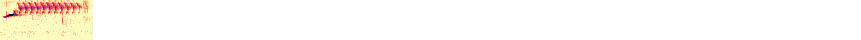

plot_thumb.many [

                                                                            ] |   0% Completed |  0.0s

plot_thumb.many [                                                                            ] |   0% Completed |  0.1s

plot_thumb.many [                                                                            ] |   0% Completed |  0.2s

plot_thumb.many [#                                                                           ] |   2% Completed |  0.3s

plot_thumb.many [###############                                                             ] |  20% Completed |  0.4s

plot_thumb.many [###############                                                             ] |  20% Completed |  0.5s

plot_thumb.many [################                                                            ] |  21% Completed |  0.6s

plot_thumb.many [###############################                                             ] |  41% Completed |  0.7s

plot_thumb.many [###############################                                             ] |  41% Completed |  0.8s

plot_thumb.many [###############################                                             ] |  41% Completed |  1.0s

plot_thumb.many [##############################################                              ] |  61% Completed |  1.1s

plot_thumb.many [##############################################                              ] |  61% Completed |  1.2s

plot_thumb.many [################################################                            ] |  64% Completed |  1.3s

plot_thumb.many [##############################################################              ] |  82% Completed |  1.4s

plot_thumb.many [##############################################################              ] |  82% Completed |  1.5s

plot_thumb.many [############################################################################] | 100% Completed |  1.6s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.0s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.1s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.2s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.3s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.5s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.6s

plot_spectro_micro.many [########                                                            ] |  12% Completed |  0.7s

plot_spectro_micro.many [

#########                                                           ] |  14% Completed |  0.8s

plot_spectro_micro.many [#############                                                       ] |  20% Completed |  0.9s

plot_spectro_micro.many [#############                                                       ] |  20% Completed |  1.0s

plot_spectro_micro.many [#############                                                       ] |  20% Completed |  1.2s

plot_spectro_micro.many [#############                                                       ] |  20% Completed |  1.3s

plot_spectro_micro.many [####################                                                ] |  29% Completed |  1.4s

plot_spectro_micro.many [########################                                            ] |  35% Completed |  1.5s

plot_spectro_micro.many [###########################                                         ] |  41% Completed |  1.6s

plot_spectro_micro.many [###########################                                         ] |  41% Completed |  1.7s

plot_spectro_micro.many [###########################                                         ] |  41% Completed |  1.8s

plot_spectro_micro.many [###########################                                         ] |  41% Completed |  1.9s

plot_spectro_micro.many [################################                                    ] |  47% Completed |  2.0s

plot_spectro_micro.many [####################################                                ] |  53% Completed |  2.2s

plot_spectro_micro.many [#######################################                             ] |  57% Completed |  2.3s

plot_spectro_micro.many [########################################                            ] |  58% Completed |  2.4s

plot_spectro_micro.many [#########################################                           ] |  61% Completed |  2.5s

plot_spectro_micro.many [#########################################                           ] |  61% Completed |  2.6s

plot_spectro_micro.many [##############################################                      ] |  67% Completed |  2.7s

plot_spectro_micro.many [##################################################                  ] |  74% Completed |  2.8s

plot_spectro_micro.many [##################################################                  ] |  74% Completed |  2.9s

plot_spectro_micro.many [######################################################              ] |  79% Completed |  3.0s

plot_spectro_micro.many [#######################################################             ] |  82% Completed |  3.2s

plot_spectro_micro.many [#########################################################           ] |  84% Completed |  3.3s

plot_spectro_micro.many [#################################################################   ] |  96% Completed |  3.4s

plot_spectro_micro.many [####################################################################] | 100% Completed |  3.5s

,f(i),f(d),f(h),f(t),p(i),p(d),p(h),p(t),1.0(i),1.0(d),1.0(h),1.0(t)
0,325379,—■■■■■■■■■ 36.8,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",325379,—■■■■■■■■■ 0.119,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",325379,—■■■■■■■■■ 0.946,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
1,100251,—■■■■■■■■■ 37.2,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",228178,—■■■■■■■■■ 0.123,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",73502,■■■■■■■■■■ 1.07,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
2,325228,■■■■■■■■■■ 39.0,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",72244,■■■■■■■■■■ 0.127,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",228178,■■■■■■■■■■ 1.07,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
3,179496,■■■■■■■■■■ 39.5,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",73502,■■■■■■■■■■ 0.128,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",320371,■■■■■■■■■■ 1.09,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
4,159140,■■■■■■■■■■ 40.7,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",179496,■■■■■■■■■■ 0.13,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",406591,■■■■■■■■■■ 1.09,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


In [ ]:
pca_spto_a = recs_pca_norm(by=search.species_proba, out_col='proba_pca').fit_recs(spto_a)
# limit = 20; pca_components = [1., .9, .8, .7, .6, .5, .4, 8, 7, 6, 5, 4, 3, 2, 1]
# limit = 10; pca_components = [1., .5, 1]
limit = 5; pca_components = [1.]

# %% {time: 5.743s}
grid_recs(
    query_rec=user_query_rec(pca_spto_a,
        user_recs.loc['20180429-dcf3'].pipe(projection.slice_spectro, 16.84, 17.92),  # SPTO spotted towhee song- kings rd
        show_probs=12,
    ),
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    # thumb_s=1,
    # thumb_s=2,
    # thumb_s=2.9,
    # thumb_s=2.99,
    # thumb_s=2.98,
    thumb_s=3,
    # thumb_s=3.01,
    # thumb_s=3.5,
    # thumb_s=1.01,
    # thumb_s=2.01,
    # thumb_s=20.01,  # FIXME (?)
)

plot_thumb.many [

                                                                            ] |   0% Completed |  0.0s

plot_thumb.many [############################################################################] | 100% Completed |  0.1s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.0s

plot_spectro_micro.many [####################################################################] | 100% Completed |  0.1s

plot_thumb.many [

                                                                            ] |   0% Completed |  0.0s

plot_thumb.many [############################################################################] | 100% Completed |  0.1s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.0s

plot_spectro_micro.many [####################################################################] | 100% Completed |  0.1s

plot_thumb.many [                                                                            ] |   0% Completed |  0.0s

plot_thumb.many [############################################################################] | 100% Completed |  0.1s

plot_spectro_micro.many [

                                                                    ] |   0% Completed |  0.0s

plot_spectro_micro.many [####################################################################] | 100% Completed |  0.1s

plot_thumb.many [                                                                            ] |   0% Completed |  0.0s

plot_thumb.many [############################################################################] | 100% Completed |  0.1s

plot_spectro_micro.many [                                                                    

] |   0% Completed |  0.0s

plot_spectro_micro.many [####################################################################] | 100% Completed |  0.1s

plot_thumb.many [                                                                            

] |   0% Completed |  0.0s

plot_thumb.many [############################################################################] | 100% Completed |  0.1s

plot_spectro_micro.many [                                                                    ] |   0% Completed |  0.0s

plot_spectro_micro.many [####################################################################] | 100% Completed |  0.1s

''

,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


''

,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


''

,thumb,micro
xc_id,,
325379,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
100251,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->","<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"

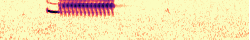
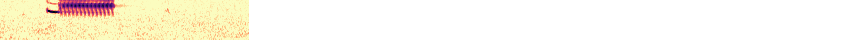
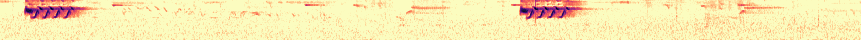
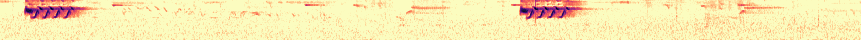

''


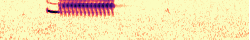


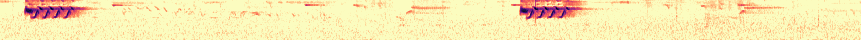


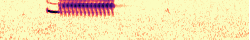

,0
0,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
1,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


In [ ]:
# FIXME thumb gets stretched (in a way that micro doesn't)...
display(

    # thumb bad, micro good
    '',
    recs_decorate(spto_a.loc[[325379, 100251]], thumb_s=1, micro_s=1)[['thumb', 'micro']],
    recs_decorate(spto_a.loc[[325379, 100251]], thumb_s=3, micro_s=3)[['thumb', 'micro']],
    recs_decorate(spto_a.loc[[325379, 100251]], thumb_s=5, micro_s=5)[['thumb', 'micro']],
    recs_decorate(spto_a.loc[[325379, 100251]], thumb_s=10, micro_s=10)[['thumb', 'micro']],

    # Same as the last one
    '',
    spto_a.loc[[325379, 100251]].pipe(df_assign_first,
        thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=10, scale=dict(h=26)),
        micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=10, scale=dict(h=26)),
    )[['thumb', 'micro']],

    # TODO Got it! scale=dict(h=26) is the problem
    '',
    spto_a.loc[[325379, 100251]].pipe(df_assign_first,
        thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=10),
        micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=10),
    )[['thumb', 'micro']],

    # TODO Why...?
    '',
    plot_thumb(spto_a.loc[325379], features, thumb_s=10, show=False),
    plot_thumb(spto_a.loc[325379], features, thumb_s=10, show=False, scale=dict(h=26)),
    plot_thumb(spto_a.loc[100251], features, thumb_s=10, show=False),
    plot_thumb(spto_a.loc[100251], features, thumb_s=10, show=False, scale=dict(h=26)),
    df_cell_display(plot_thumb(spto_a.loc[325379], features, thumb_s=10, show=False)),
    df_cell_display(plot_thumb(spto_a.loc[325379], features, thumb_s=10, show=False, scale=dict(h=26))),
    DF(df_cell_display.many([
        plot_thumb(spto_a.loc[100251], features, thumb_s=10, show=False, scale=dict(h=26)),
        plot_thumb(spto_a.loc[325379], features, thumb_s=10, show=False, scale=dict(h=26)),
    ])),
    # Getting closer, but still missing something...

)

In [ ]:
# XXX Fixed
display(
    spto_a.loc[325379].duration_s,
    3 - spto_a.loc[325379].duration_s,
    rec_thumb(spto_a.loc[325379], features, thumb_s=1).duration_s,
    rec_thumb(spto_a.loc[325379], features, thumb_s=2).duration_s,
    rec_thumb(spto_a.loc[325379], features, thumb_s=3).duration_s,
    rec_thumb(spto_a.loc[325379], features, thumb_s=4).duration_s,
)

numpy.float64(2.9049886621315193)

numpy.float64(0.0950113378684807)

1.0

2.0

2.9049886621315193

2.9049886621315193

''

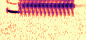

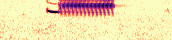

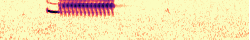

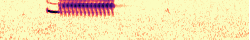

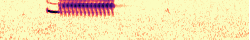

''

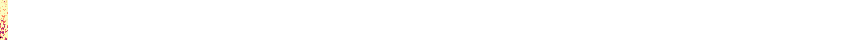

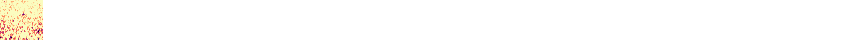

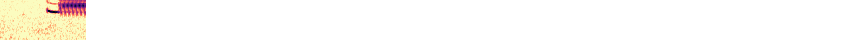

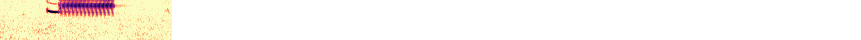

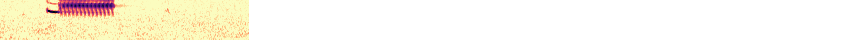

''

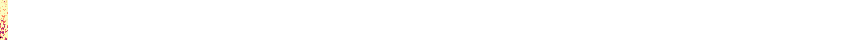

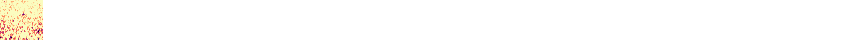

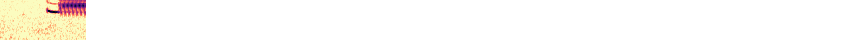

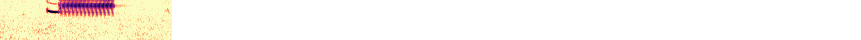

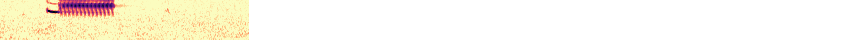

''

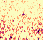

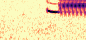

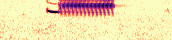

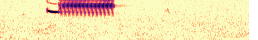

''

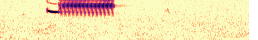

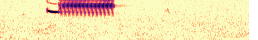

In [ ]:
# XXX Fixed
from viz import *
with cache_control(enabled=False):

    display('')
    plot_thumb(spto_a.loc[325379], features, thumb_s=1)
    plot_thumb(spto_a.loc[325379], features, thumb_s=2)
    plot_thumb(spto_a.loc[325379], features, thumb_s=3)
    plot_thumb(spto_a.loc[325379], features, thumb_s=4)
    plot_thumb(spto_a.loc[325379], features, thumb_s=5)
    plot_thumb(spto_a.loc[325379], features, thumb_s=5, scale=dict(h=26))

    display('')
    plot_spectro_micro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.1),
    plot_spectro_micro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.5),
    plot_spectro_micro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=1),
    plot_spectro_micro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=2),
    plot_spectro_micro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=3),

    display('')
    plot_spectro_wrap(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.1),
    plot_spectro_wrap(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.5),
    plot_spectro_wrap(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=1),
    plot_spectro_wrap(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=2),
    plot_spectro_wrap(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=3),

    display('')
    plot_spectro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.1),
    plot_spectro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=.5),
    plot_spectro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=1),
    plot_spectro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=2),
    plot_spectro(rec_thumb(spto_a.loc[325379], features, thumb_s=3), features, limit_s=3),

    display('')
    plot_spectro_micro(spto_a.loc[325379], features, wrap_s=3)
    plot_spectro_wrap(spto_a.loc[325379], features, wrap_s=3)

NO_AUDIO_ID  2018-04-29T16:35:13  SPTO  1.1s  SPTO spotted towhee song- kings rd[16840:17920]


,species,p
0,CHSP,0.025
1,BEWR,0.024
2,OATI,0.023
3,SAPH,0.022
4,DEJU,0.022
5,SPTO,0.022
6,PAGP,0.021
7,AMGO,0.021
8,WATA,0.021
9,SPSA,0.021


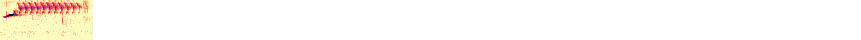

,f(i),f(d),f(h),f(t),p(i),p(d),p(h),p(t),1.0(i),1.0(d),1.0(h),1.0(t)
0,325379,—■■■■■■■■■ 36.8,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",325379,—■■■■■■■■■ 0.119,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",325379,—■■■■■■■■■ 0.946,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
1,100251,—■■■■■■■■■ 37.2,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",228178,—■■■■■■■■■ 0.123,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",73502,■■■■■■■■■■ 1.07,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
2,325228,■■■■■■■■■■ 39.0,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",72244,■■■■■■■■■■ 0.127,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",228178,■■■■■■■■■■ 1.07,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
3,179496,■■■■■■■■■■ 39.5,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",73502,■■■■■■■■■■ 0.128,coa,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",320371,■■■■■■■■■■ 1.09,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"
4,159140,■■■■■■■■■■ 40.7,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",179496,■■■■■■■■■■ 0.13,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",406591,■■■■■■■■■■ 1.09,whe,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->"


In [ ]:
query_rec = (user_recs
    .loc['20180429-dcf3']  # SPTO spotted towhee song- kings rd
    .pipe(projection.slice_spectro, 16.84, 17.92)
    .pipe(pca_spto_a.transform_rec)
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search)[:12])
plot_spectro_micro(query_rec, features,
    # audio=True,
)
grid_recs(
    query_rec=query_rec,
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=312024,  # coastal
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=127014,  # wheeze (noisy)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=159823,  # wheeze
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=182566,  # wheeze
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=168046,  # mx (not many mx's)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=274874,  # interior
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
grid_recs(
    query_rec=126698,  # coastal (weird)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

In [ ]:
query_rec = (user_recs
    .loc['20160923-0ac1']
    .pipe(projection.slice_spectro, 12, 13.5)
    .pipe(pca_spto_a.transform_rec)
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search)[:12])
plot_spectro_micro(query_rec, features,
    # audio=True,
)
grid_recs(
    query_rec=query_rec,
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)